# Area Charts with Matplotlib

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
# Setting seaborn as default style even if use only matplotlib
sns.set()

## Example 2: Using Pandas DataFrames

### Datasets for Visualizations

In [2]:
# url 1
grouped_country_df_url = "https://raw.githubusercontent.com/nyangweso-rodgers/Data_Analytics/main/Analytics-with-Python/Exploratory-Data-Analysis-with-Python/Exploratory-Data-Analysis-for-Online-Retail-Store/grouped_country_data.csv"
grouped_country_df = pd.read_csv(grouped_country_df_url)

# url 2
grouped_daily_country_df_url = "https://raw.githubusercontent.com/nyangweso-rodgers/Data_Analytics/main/Analytics-with-Python/Exploratory-Data-Analysis-with-Python/Exploratory-Data-Analysis-for-Online-Retail-Store/grouped_daily_country_df.csv"
grouped_daily_country_df = pd.read_csv(grouped_daily_country_df_url)

In [3]:
# preview the data
grouped_country_df.head()

,Country,CountOfUniqueCustomers,TotalAmount,CountOfUniqueInvoices,AverageSalesValue
0,Australia,9,138521.31,57,15391.256667
1,Austria,11,10198.68,17,927.152727
2,Bahrain,2,548.40,2,274.200000
3,Belgium,25,41196.34,98,1647.853600
4,Brazil,1,1143.60,1,1143.600000


In [4]:
grouped_daily_country_df.head()

,Date,Country,MonthYear,TotalAmount,CountOfUniqueInvoices,CountOfUniqueCustomers
0,2010-12-01,Australia,2010-12,358.25,1,1
1,2010-12-01,EIRE,2010-12,555.38,2,1
2,2010-12-01,France,2010-12,855.86,1,1
3,2010-12-01,Germany,2010-12,261.48,1,1
4,2010-12-01,Netherlands,2010-12,192.60,1,1


#### Data Aggregations for Visualizations

In [7]:
# get month on month total sales value
monthly_agg_df = grouped_daily_country_df.groupby('MonthYear').agg(
    TotalAmount = pd.NamedAgg(column='TotalAmount', aggfunc='sum')
).reset_index()

# get month on month total sales value by Country
country_monthly_agg_df = grouped_daily_country_df.groupby(['MonthYear', 'Country']).agg(
    TotalAmount = pd.NamedAgg(column='TotalAmount', aggfunc='sum')
).reset_index()

In [8]:
country_monthly_agg_df

,MonthYear,Country,TotalAmount
0,2010-12,Australia,1032.85
1,2010-12,Austria,277.20
2,2010-12,Belgium,1809.91
3,2010-12,Channel Islands,363.53
4,2010-12,Cyprus,1590.82
...,...,...,...
282,2011-12,Portugal,2808.19
283,2011-12,Spain,316.21
284,2011-12,Sweden,238.00
285,2011-12,USA,885.24


<Axes: >

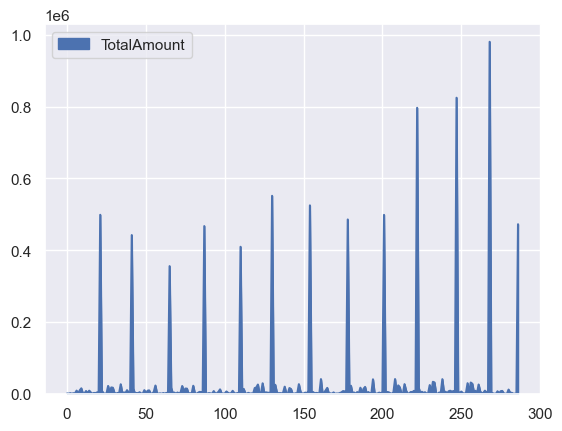

In [9]:
country_monthly_agg_df.plot(kind='area')

### Stacked Area Chart

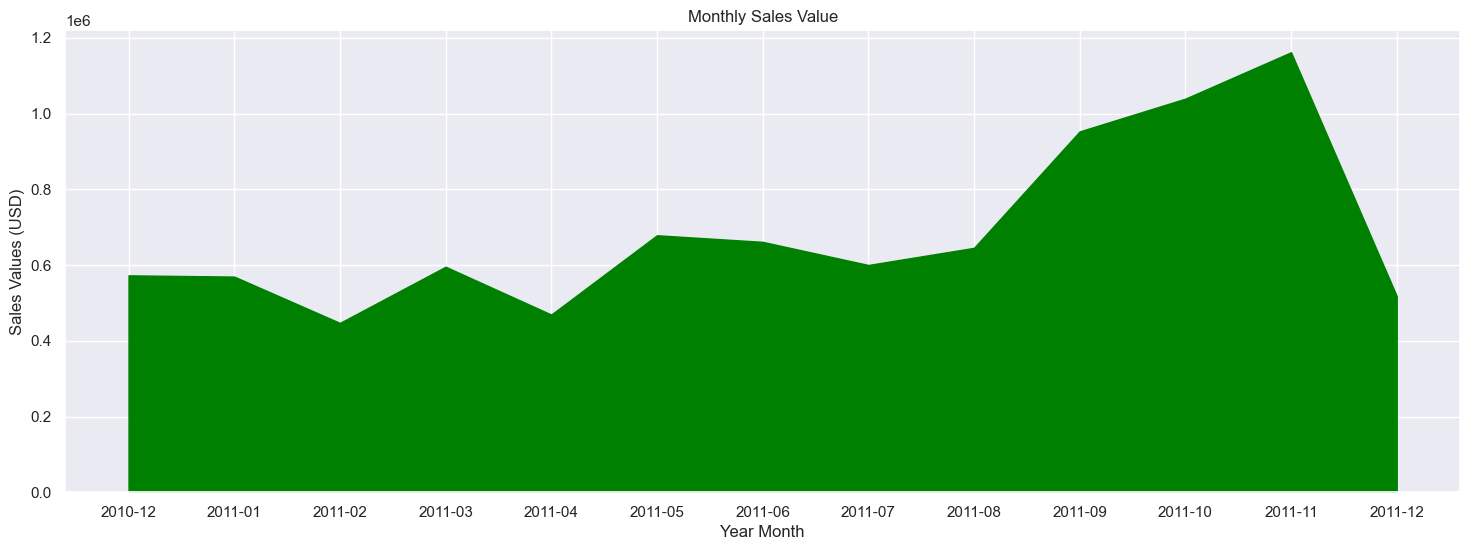

In [11]:
fig, axes = plt.subplots(1,1, figsize=(18,6), sharey=True)
plt.stackplot(monthly_agg_df.MonthYear, monthly_agg_df.TotalAmount, color='green')
plt.title("Monthly Sales Value")
plt.ylabel("Sales Values (USD)")
plt.xlabel("Year Month")
plt.show()